In [1]:
#cross validation increases training time
#the specified value k represents the number of divisions of the dataset

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
data=pd.read_csv("kanser.csv")

In [4]:
data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [5]:
data.diagnosis=[1 if each =="M" else 0 for each in data.diagnosis]

In [6]:
y=data.diagnosis.values
X=data.drop(["diagnosis"],axis=1)

In [7]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)   

In [14]:
from sklearn.ensemble import RandomForestClassifier
kfold=KFold(n_splits=5, shuffle=True, random_state=42)
rf=RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
cv_score=cross_val_score(rf,Xtrain,ytrain,cv=kfold)

In [20]:
print("Cross Validation Scores: ",cv_score)

Cross Validation Scores:  [0.95604396 0.96703297 0.97802198 0.94505495 0.92307692]


In [22]:
print("Cross validation mean: ",np.mean(cv_score))

Cross validation mean:  0.9538461538461538


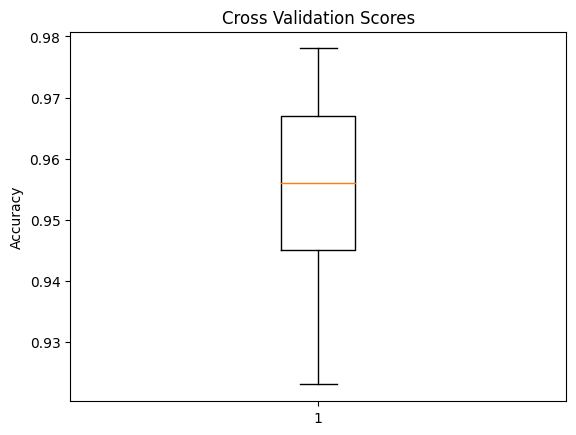

In [23]:
import matplotlib.pyplot as plt
plt.boxplot(cv_score)
plt.title("Cross Validation Scores")
plt.ylabel("Accuracy")
plt.show()